#Imports & Paths

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [2]:
train_dir = "data/train"
val_dir = "data/validation"
test_dir = "data/test"

#Data Generators

Training generator (with augmentation)

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=False
)

Validation & Test generator (NO augmentation)

In [4]:
val_test_datagen = ImageDataGenerator(rescale=1./255)

#Load data from directories

In [5]:
#Load data from directories
img_size = (224, 224)
batch_size = 8

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 13 images belonging to 13 classes.


Found 13 images belonging to 13 classes.
Found 13 images belonging to 13 classes.



#Load pre-trained model (Transfer Learning)

In [7]:
base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(224, 224, 3)
)

Freeze pretrained layers

In [8]:
for layer in base_model.layers:
    layer.trainable = False


#Add Custom Classification Head

In [13]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
output = Dense(13, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output)

#Compile the model

In [14]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

#Train the model

In [15]:
epochs = 15

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

Epoch 1/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.0000e+00 - loss: 3.4001 - val_accuracy: 0.2308 - val_loss: 2.6748
Epoch 2/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 321ms/step - accuracy: 0.2308 - loss: 2.5724 - val_accuracy: 0.2308 - val_loss: 2.2120
Epoch 3/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 420ms/step - accuracy: 0.3077 - loss: 2.1240 - val_accuracy: 0.3846 - val_loss: 1.8593
Epoch 4/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 320ms/step - accuracy: 0.4615 - loss: 1.7902 - val_accuracy: 0.3846 - val_loss: 1.6077
Epoch 5/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 436ms/step - accuracy: 0.4615 - loss: 1.5682 - val_accuracy: 0.5385 - val_loss: 1.4156
Epoch 6/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 403ms/step - accuracy: 0.4615 - loss: 1.3917 - val_accuracy: 0.7692 - val_loss: 1.2144
Epoch 7/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 314ms/step - accuracy: 0.5385 - loss: 1.2006 - val_accuracy: 0.6923 - val_loss: 1.0650
Epoch 8/15
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 427ms/step - accuracy: 0.7692 - loss: 0.8766 - val_accuracy: 0.7692 - val_loss

#Evaluate the model on test data

In [16]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9231 - loss: 0.5409
Test Accuracy: 0.92


#Vizualize training history

#Accuracy Plot

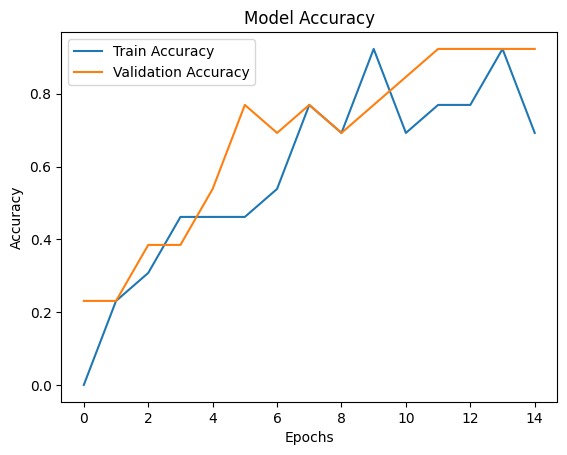

In [17]:
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.show()

#Loss Plot

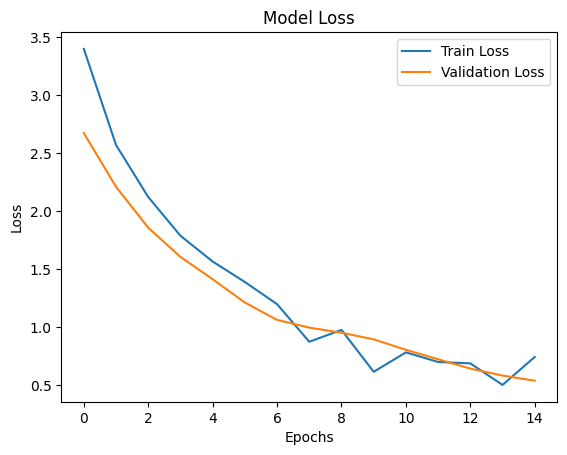

In [18]:
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.show()


Predict on a New Image

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Replace with path to your test image
img_path = "sample_test_image.png"
img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

prediction = model.predict(img_array)
class_index = np.argmax(prediction)

class_labels = list(train_generator.class_indices.keys())
print("Predicted Card:", class_labels[class_index])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Card: Ace_of_Spades


In [21]:
model.save("card_classifier_spades.h5")